In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


### Cargar los datos a estudiar

In [18]:
import pandas as pd

df = pd.read_csv('permisos_construccion.csv')

C:\Users\santi\AppData\Local\Temp\ipykernel_18684\3263701215.py:3: DtypeWarning: Columns (22,32,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('permisos_construccion.csv')


### Hacer un resumen con la explicación de las variables del juego de datos

En el juego de datos se describen los permisos de construcción de distintas edificaciones. El juego tiene 43 columnas, que se dividen en las siguientes categorías:
+ **Identificación del permiso**: `Permit Number`, `Permit Type`, `Permit Type Definition`, `Permit Creation Date`
+ **Ubicación de la construcción**: `Block`, `Lot`, `Street Number`, `Street Name`, `Street Suffix`, `Unit`, `Unit Suffix`
+ **Descripción de la obra**: `Description`
+ **Estado y fecha del permiso**: `Current Status`, `Current Status Date`, `Filed Date`, `Issued Date`, `Completed Date`, `First Construction Document Date`, `Permit Expiration Date`
+ **Información de la construcción**: `Number of Existing Stories`, `Number of Proposed Stories`, `Estimated Cost`, `Revised Cost`, `Existing Use`, `Existing Units`, `Proposed Use`, `Proposed Units`, `Plansets`, `Existing Construction Type`, `Existing Construction Type Description`, `Proposed Construction Type`, `Proposed Construction Type Description`, `Supervisor District`, `Neighborhoods - Analysis Boundaries`, `Zipcode`, `Location`, `Record ID`
+ **Datos del permiso**: `Voluntary Soft-Story Retrofit`, `Fire Only Permit`, `Structural Notification`, `TIDF Compliance`, `Site Permit`

### Realizar un análisis exploratorio de los datos

In [19]:
# a. Calcular cantidad de filas y columnas

rows, columns = df.shape
print(f'Cantidad de filas: {rows}')
print(f'Cantidad de columnas: {columns}')

Cantidad de filas: 198910
Cantidad de columnas: 43


In [20]:
# b. Observar y mostrar las primeras 5 filas

df.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,M788927,8,otc alterations permit,05/23/2017,0215,001,1333,NaN,jOnEs,St,...,NaN,NaN,NaN,NaN,NaN,3.0,Nob Hill,94109.0,"(37.79362102799777, -122.41488237355445)",1464153232862
1,201305318356,8,otc alterations permit,05/31/2013,1810,017A,1483,NaN,43rD,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,4.0,Sunset/Parkside,94122.0,"(37.759041020475465, -122.50286985467523)",1306559115258
2,201705106205,8,otc alterations permit,05/10/2017,5700,027,431,NaN,pReNtIsS,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,9.0,Bernal Heights,94110.0,"(37.73778863007536, -122.41197863877355)",1462579187173
3,201410279983,8,otc alterations permit,10/27/2014,0661,005,2020,NaN,bUsH,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,5.0,Pacific Heights,94115.0,"(37.78762264983362, -122.43099126735969)",136037778128
4,201310280388,8,otc alterations permit,10/28/2013,3642,051A,871,NaN,cApP,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,9.0,Mission,94110.0,"(37.75275550565926, -122.41707462095194)",1322242163712


In [21]:
# c. Evaluar la existencia de datos faltantes y duplicados. Cuantificarlos y calcular el porcentaje sobre el total de filas

df.duplicated() #calcular la cantidad de datos duplicados
duplicated_values = df.duplicated().sum() #calcular la cantidad de datos duplicados
print(f'Cantidad de datos duplicados: {duplicated_values}')
row_total = df.shape[0]
print(f'Total de filas: {row_total}')
duplicated_percent = duplicated_values / row_total * 100
print(f'Porcentaje de datos duplicados: {duplicated_percent}%')

Cantidad de datos duplicados: 0
Total de filas: 198910
Porcentaje de datos duplicados: 0.0%


In [22]:
df_missing = pd.DataFrame(df.isnull().sum(), columns=['Cantidad de datos faltantes'])
df_missing['Porcentaje de datos faltantes'] = df.isnull().sum() / row_total * 100
df_missing

# Columnas con datos faltantes entre el 50 y 100%
df_missing[(df_missing['Porcentaje de datos faltantes'] < 100) & (df_missing['Porcentaje de datos faltantes'] > 50)]

#Street Number Suffix puede ser nulo porque no todas las direcciones tienen un sufijo
#Zipcode puede ser nulo porque el area no tiene codigo postal() o porque no se ha ingresado
#Unit puede ser nulo porque no todas las direcciones tienen un número de unidad o porque no se ha ingresado

,Cantidad de datos faltantes,Porcentaje de datos faltantes
Street Number Suffix,196694,98.885928
Unit,169430,85.179227
Unit Suffix,196949,99.014127
Completed Date,101715,51.136192
Structural Notification,191988,96.520034
Voluntary Soft-Story Retrofit,198875,99.982404
Fire Only Permit,180082,90.534413
TIDF Compliance,198908,99.998995
Site Permit,193550,97.305314


In [23]:
# Muestra los distintos valores de la columna Street Number Suffix
print("Los valores que toma la columna Street Number Suffix son:" , df['Street Number Suffix'].unique())

# Muestra los distintos valores de la columna Street Suffix
print("Los valores que toma la columna Street Suffix son:" , df['Street Suffix'].unique())

# Muestra los distintos valores de la columna Unit Suffix
# print("Los valores que toma la columna Unit Suffix son:" , df['Unit Suffix'].unique())

Los valores que toma la columna Street Number Suffix son: [nan 'B' 'A' 'V' 'D' 'K' 'C' 'F' 'H' 'E' 'L' 'J' 'R' 'P' 'I' 'N' 'G' '½'
 '0']
Los valores que toma la columna Street Suffix son: ['St' 'Av' 'Bl' nan 'Wy' 'Dr' 'Hy' 'Tr' 'Rd' 'Ct' 'Pl' 'Pk' 'Ln' 'Cr' 'Pz'
 'Al' 'No' 'Rw' 'Wk' 'So' 'Hl' 'Sw']


In [24]:
# Obtener las columnas que tienen a lo sumo 20 valores únicos
discrete_columns = [column for column in df.columns if len(df[column].unique()) <= 20]
# Filtrar las columnas que tienen datos booleanos
boolean_columns = [column for column in df.columns if len(df[column].unique()) == 2]
# Obtener las columnas que tienen exactamente 3 valores únicos
columns_with_3_unique_values = [column for column in df.columns if len(df[column].unique()) == 3]

print("Columnas con a lo sumo 20 valores únicos: ", discrete_columns)
print("Columnas con datos booleanos: ", boolean_columns)
print("Columnas con exactamente 3 valores únicos: ", columns_with_3_unique_values)

# Muestra los distintos valores de la columna TIDF Compliance
print("Los valores que toma la columna TIDF Compliance son:" , df['TIDF Compliance'].unique())
df['TIDF Compliance'].value_counts()

Columnas con a lo sumo 20 valores únicos:  ['Permit Type', 'Permit Type Definition', 'Street Number Suffix', 'Current Status', 'Structural Notification', 'Voluntary Soft-Story Retrofit', 'Fire Only Permit', 'Plansets', 'TIDF Compliance', 'Existing Construction Type', 'Existing Construction Type Description', 'Proposed Construction Type', 'Proposed Construction Type Description', 'Site Permit']
Columnas con datos booleanos:  ['Structural Notification', 'Voluntary Soft-Story Retrofit', 'Fire Only Permit', 'Site Permit']
Columnas con exactamente 3 valores únicos:  ['TIDF Compliance']
Los valores que toma la columna TIDF Compliance son: [nan 'P' 'Y']


TIDF Compliance
P    1
Y    1
Name: count, dtype: int64

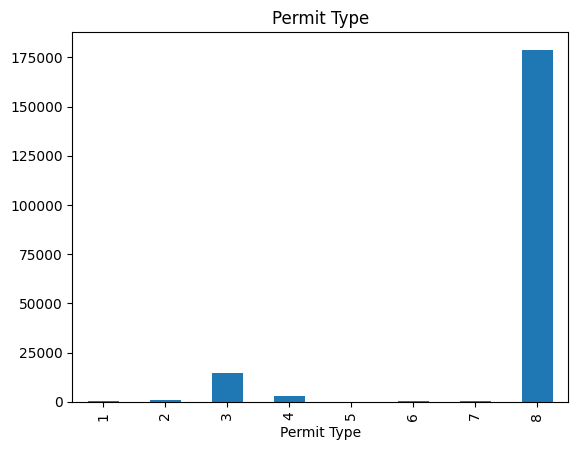

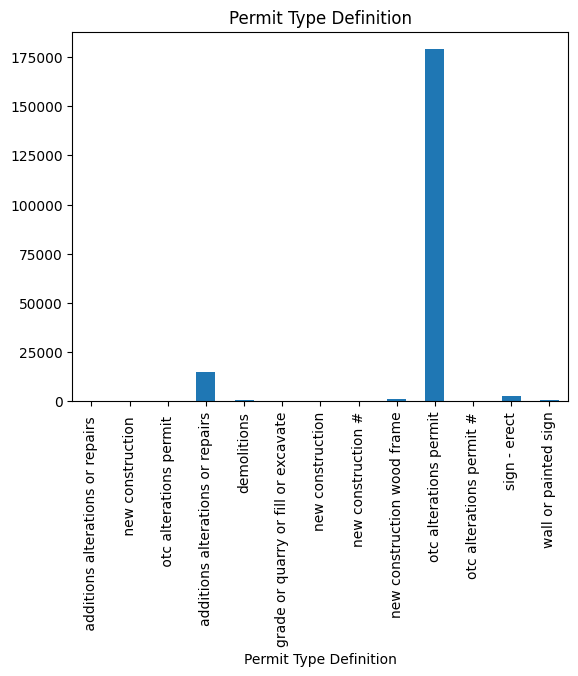

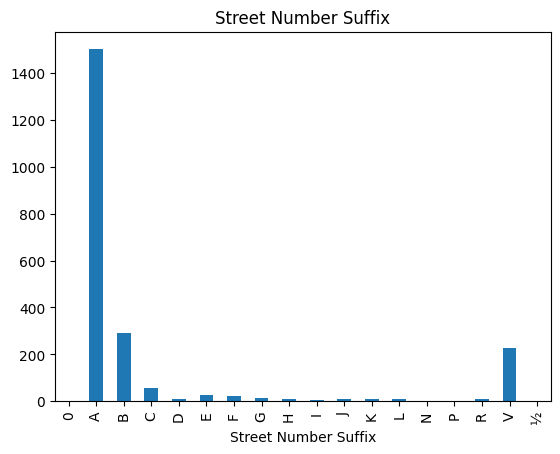

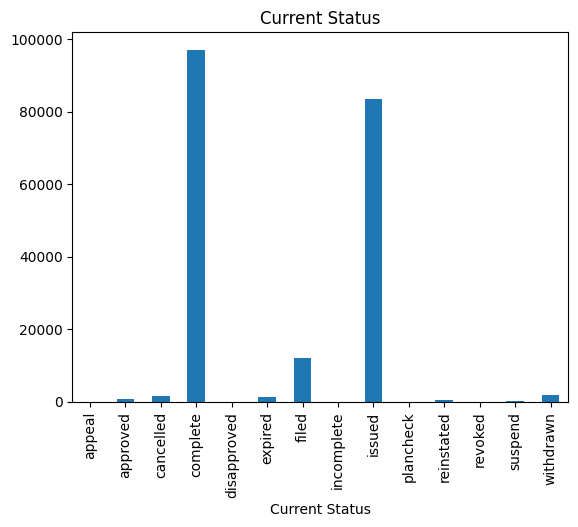

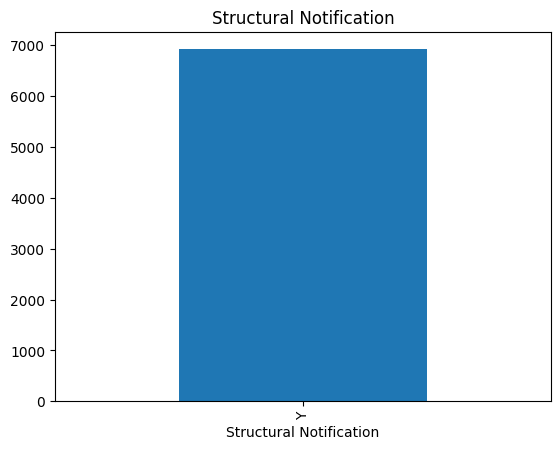

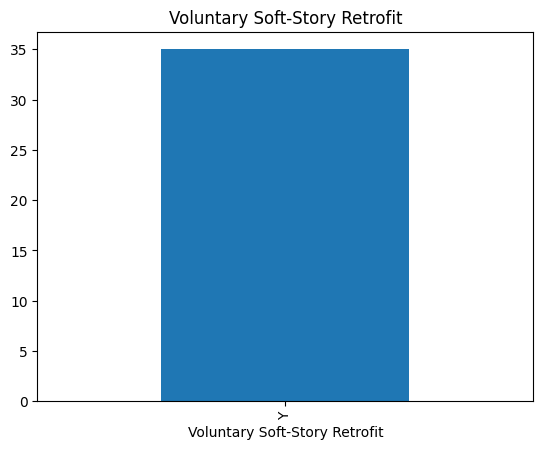

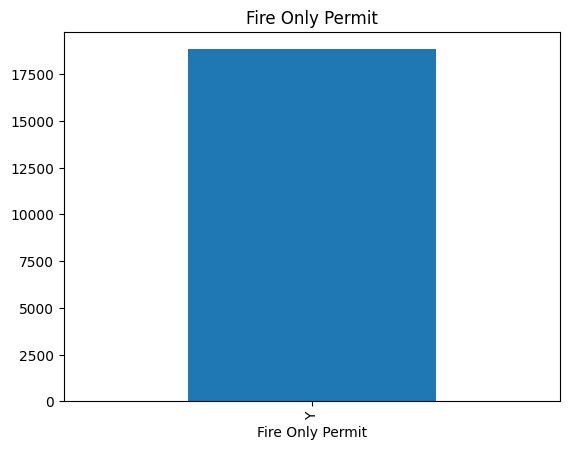

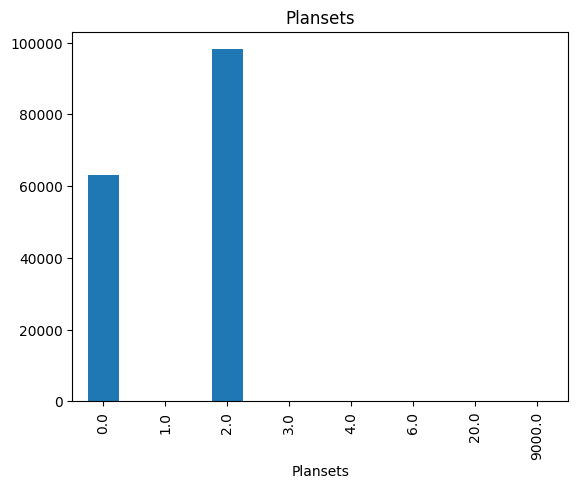

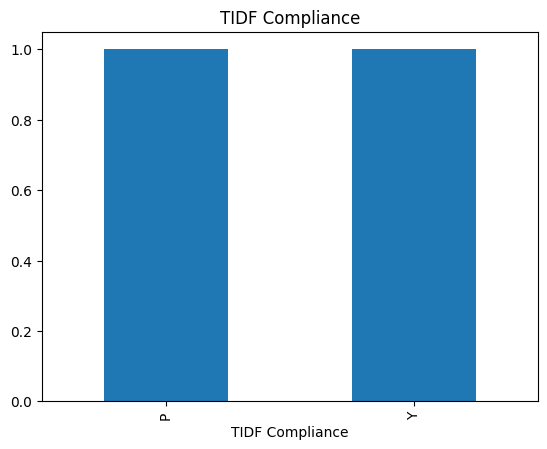

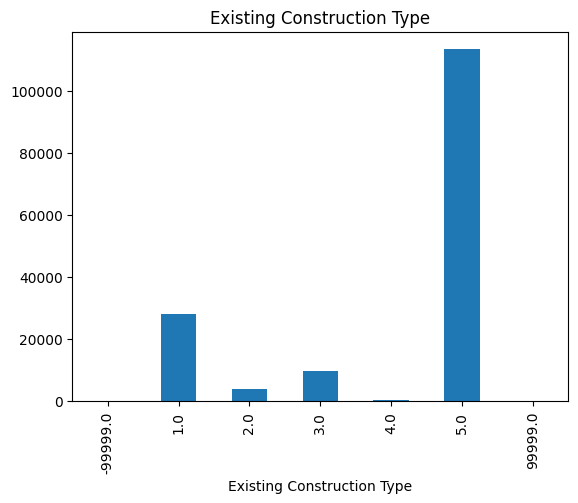

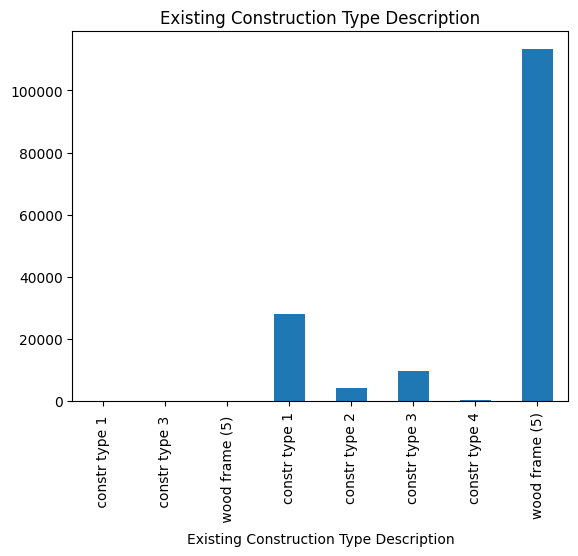

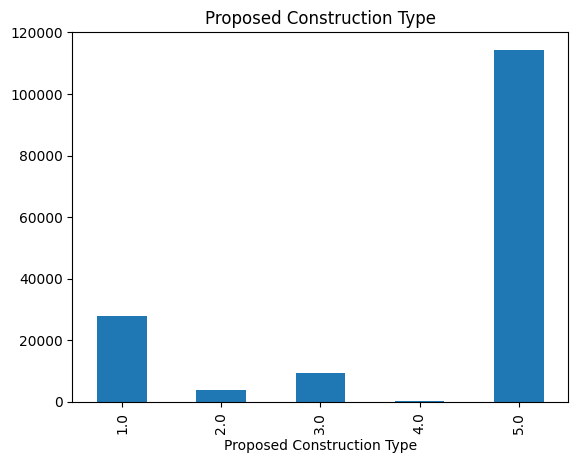

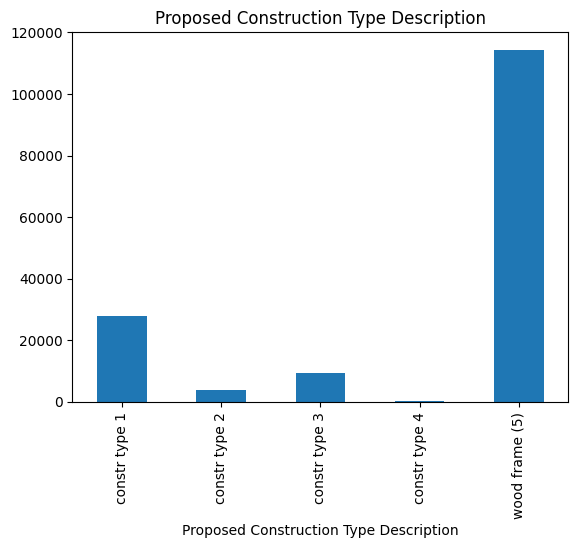

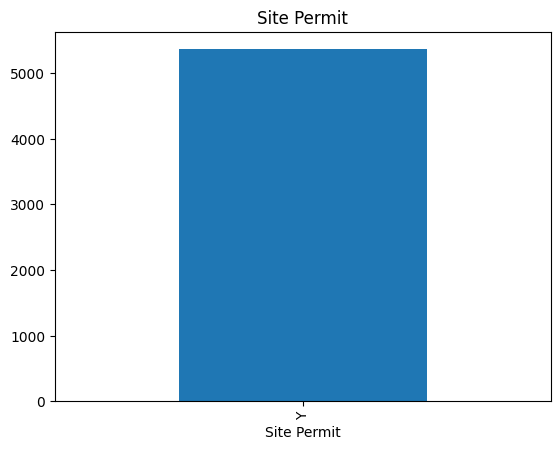

In [25]:
# Creación de histogramas de las columnas discretas
for column in discrete_columns:
    df[column].value_counts().sort_index().plot(kind='bar')
    plt.title(column)
    plt.show()
    

In [26]:
# Para los datos faltantes, evaluar posibles motivos de esto en cada caso.

Para los datos faltantes, evaluar posibles motivos de esto en cada caso.

La columna TIDF solo tiene dos valores distintos de 0.

In [27]:
# Para variables discretas, evaluar los posibles valores de cada variable

discrete_columns = [
    'Street Suffix',
    'Current Status',
    'Number of Existing Stories',
    'Number of Proposed Stories',
    'Voluntary Soft-Story Retrofit', 
    'Fire Only Permit', 
    'Permit Expiration Date', 
    'Existing Use',
    'Existing Units',
    'Proposed Use',
    'Proposed Units', 
    'Plansets', 'TIDF Compliance', 'Existing Construction Type', 'Proposed Construction Type', 'Site Permit', 'Supervisor District', 'Zipcode']

discrete_df = df[discrete_columns]
discrete_df

,Street Suffix,Current Status,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Proposed Construction Type,Site Permit,Supervisor District,Zipcode
0,St,issued,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,94109.0
1,Av,complete,2.0,2.0,NaN,NaN,05/29/2014,1 family dwelling,1.0,1 family dwelling,1.0,2.0,NaN,5.0,5.0,NaN,4.0,94122.0
2,St,issued,2.0,2.0,NaN,NaN,05/06/2018,1 family dwelling,1.0,1 family dwelling,1.0,0.0,NaN,5.0,5.0,NaN,9.0,94110.0
3,St,complete,2.0,2.0,NaN,NaN,10/22/2015,2 family dwelling,2.0,2 family dwelling,2.0,0.0,NaN,5.0,5.0,NaN,5.0,94115.0
4,St,issued,2.0,2.0,NaN,NaN,10/23/2014,apartments,4.0,apartments,4.0,0.0,NaN,5.0,5.0,NaN,9.0,94110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198905,Av,complete,2.0,2.0,NaN,NaN,07/03/2019,retail sales,0.0,retail sales,0.0,2.0,NaN,2.0,2.0,NaN,7.0,94132.0
198906,St,issued,3.0,3.0,NaN,Y,10/21/2016,1 family dwelling,1.0,1 family dwelling,1.0,2.0,NaN,5.0,5.0,NaN,10.0,94107.0
198907,Av,issued,2.0,2.0,NaN,NaN,07/24/2017,1 family dwelling,1.0,1 family dwelling,1.0,0.0,NaN,5.0,5.0,NaN,10.0,94110.0
198908,NaN,issued,2.0,2.0,NaN,NaN,01/27/2018,retail sales,9.0,retail sales,9.0,2.0,NaN,5.0,5.0,NaN,3.0,94133.0


In [28]:
# Hay una columna que dice permiso de incendio, que tiene casi todos los valores null, y un par de Y. Entonces lo que se asume es que es una variable booleana, que indica si el permiso es necesaria o no.
# Puede haber columnas en desuso. Fijarse para decir, esta columna no se usa por esto.
# Las variables discretas que nos interesan son las de categorías, como tipos de permiso, no las de cantidad de pisos por ejemplo, ni las que son un montón, como nombre de calle o código postal.

## Normalizacion de datos


La normalizacion de variables es el proceso de transformar las variables de manera que los valores se ajusten a un rango o distribucion especifica. El objetivo principal de la normalizacion es poner todas las variables en una escala comun, esto es importante cuando se trabaja con algoritmos de machine learning o analisis estadisticos que son sensibles a la magnitud de los datos.

In [29]:
# Estimated Cost,Revised Cost
scaler = MinMaxScaler()
df['Estimated Cost Normalized'] = scaler.fit_transform(df[['Estimated Cost']])
df['Revised Cost Normalized'] = scaler.fit_transform(df[['Revised Cost']])

#lo mismo pero para Number of Existing Stories y Number of Proposed Stories
df['Number of Existing Stories Normalized'] = scaler.fit_transform(df[['Number of Existing Stories']])
df['Number of Proposed Stories Normalized'] = scaler.fit_transform(df[['Number of Proposed Stories']])


Parte 6:

In [2]:
from ydata_profiling import ProfileReport
import pandas as pd

#Abre y lee el set de datos
dfn = pd.read_csv('permisos_construccion.csv')

#Genera un reporte detallado sobre los datos usando la libreria de profiling
profile = ProfileReport(dfn, title="Reprote",explorative=True)

#Traduce el reporte a un formato html, para leerlo bien hay que abrirlo en un navegador
profile.to_file(output_file="Profiling_html.html")


/tmp/ipykernel_3759/2456054967.py:5: DtypeWarning: Columns (22,32,38) have mixed types. Specify dtype option on import or set low_memory=False.
  dfn = pd.read_csv('dataset.csv')
Export report to file: 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]


Como podemos observar en el reporte generado por la librería todas nuestras gráficas coinciden. La gran diferencia es que las gráficas del reporte generado dicen los datos faltantes cosa que en nuestro informe aparece por separado. La gráfica generada de existing construction type es menos clara que la nuestra, ya que busca poner una escala demasiado grande y termina poniendo la mayoría de los datos en una barra sola.

La otra diferencia sustancial es que el informe generado por ydata_profiling es más detallado, porque hizo gráficas para cada valor independiente mientras que nosotros generalizamos un poquito.